# Employee Attrition Prediction

## Problem statement and Objectives

Within the context of human resources (HR), attrition is a reduction in the workforce caused by retirement or resignation. This is a serious problem faced by several organizations around the world as attrition is economically damaging to the organizations as the replacement employees have to be hired at a cost and trained again at a cost. High Rates of Attrition also damages the brand value of the company.<br>
The Dataset belongs to a very fast-growing company. This company has witnessed several employees leaving the company in the last 3 years. The company’s HR team has always been reactive to attrition but now the team wants to be proactive and wished to predict attrition of employees using the data they have in hand.<br>
The goal here is to predict whether an employee will leave the company based upon the various variables given in the dataset.

## Importing libraries

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

## Data Dictionary

In [2]:
dictionary = pd.read_csv("Data_Dictionary.csv", encoding='cp1252')
dictionary

,Variable,Description
0,EmployeeID,Unique employee code
1,Attrition,Attrition flag
2,Age,Age of employee
3,TravelProfile,Status of travel in job profile
4,Department,Department of employee
5,HomeToWork,Distance between home to work
6,EducationField,Field of education of an employee
7,Gender,Gender of an employee
8,HourlnWeek,Work hours of an employee in a week
9,Involvement,Involvement of any employee in engagement acti...


## Loading the dataset

In [3]:
dataset = pd.read_csv("Train_Dataset.csv")
dataset.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,1.0,Executive,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,3.0,Executive,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,3.0,Manager,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,2.0,Manager,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,4.0,Manager,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [4]:
df = dataset.copy()

## Exploratory data analysis

In [5]:
df.shape

(7810, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   float64
 1   Attrition           5180 non-null   float64
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   float64
 10  WorkLifeBalance     5180 non-null   float64
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   float64
 13  ESOPs               5180 non-null   float64
 14  NumCompaniesWorked  5180 non-null   float64
 15  OverTime            5180 non-null   float64
 16  Salary

In [7]:
df.describe()

,EmployeeID,Attrition,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
count,5.180000e+03,5180.000000,4864.000000,4925.000000,4893.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5011.000000,4993.000000,5110.000000,4869.000000,5087.000000
mean,5.112590e+06,0.278958,37.108553,11.107411,57.979767,3.226641,3.012741,3.144402,0.490541,3.157336,0.313514,20.649371,11.165832,2.552838,4.385295,21692.296442
std,1.495482e+03,0.448530,9.248647,8.455577,12.996674,0.872431,1.410602,1.342776,0.499959,2.606036,0.463966,3.706469,7.797783,3.234467,3.617643,4770.637922
min,5.110001e+06,0.000000,18.000000,1.000000,10.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1000.000000
25%,5.111296e+06,0.000000,30.000000,5.000000,49.000000,3.000000,2.000000,2.000000,0.000000,1.000000,0.000000,18.000000,6.000000,1.000000,2.000000,18362.000000
50%,5.112590e+06,0.000000,36.000000,9.000000,59.000000,3.000000,3.000000,3.000000,0.000000,2.000000,0.000000,20.000000,9.000000,1.000000,3.000000,20160.000000
75%,5.113885e+06,1.000000,43.000000,16.000000,67.000000,4.000000,4.000000,4.000000,1.000000,5.000000,1.000000,23.000000,15.000000,3.000000,7.000000,23443.500000
max,5.115180e+06,1.000000,61.000000,121.000000,99.000000,5.000000,5.000000,5.000000,1.000000,21.000000,1.000000,31.000000,41.000000,16.000000,18.000000,95000.000000


In [8]:
df[df["EmployeeID"].isna()]

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
5180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Note:- There are missing data when the employee id is null. We can remove these rows.

In [9]:
df = df[~df["EmployeeID"].isna()]

In [10]:
df.shape

(5180, 22)

In [11]:
def pieplot(feature):
    plt.figure(figsize=(4,4))
    labels = df[feature].value_counts().keys()
    plt.pie(x=df[feature].value_counts(), autopct='%1.1f%%', labels=labels)
    plt.title(feature)
    plt.show()

def displot(feature):
    plt.figure(figsize=(4,4))
    sns.displot(data=df, x=feature, kde=True, color="blue")
    plt.show()

def countplot(feature):
    plt.figure(figsize=(4,4))
    sns.countplot(data = df, x=feature)
    plt.xticks(rotation=90)
    plt.show()

def boxplot(feature):
    plt.figure(figsize=(4,4))
    sns.boxplot(data=df, x=feature)
    plt.title(f"Boxplot of {feature}")
    plt.show()

## Univariate Analysis

### Target Variable:- Attrition

In [12]:
df["Attrition"].value_counts()
# 1 indicates the employee has resigned or retired. 0 indicates the employee still works or retained.

Attrition
0.0    3735
1.0    1445
Name: count, dtype: int64

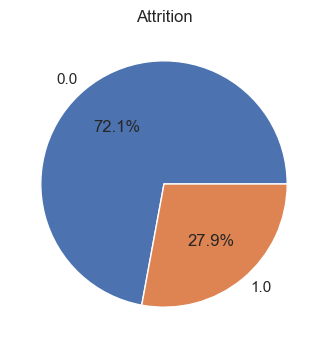

In [13]:
pieplot("Attrition")

### Age

<Figure size 400x400 with 0 Axes>

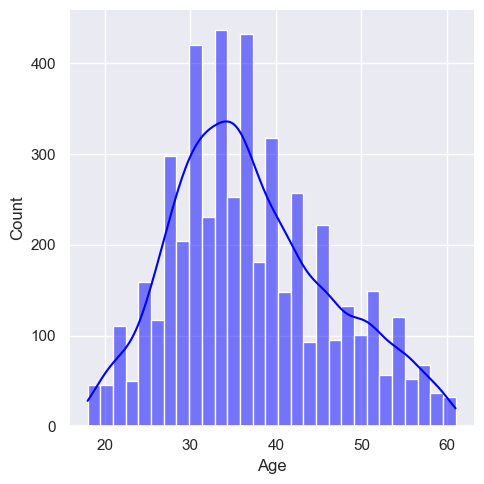

In [14]:
displot("Age")

#### Note:- age follows a normal distribution we can fill missing values with mean

### TravelProfile

In [15]:
df["TravelProfile"].value_counts()

TravelProfile
Rarely    3637
Yes       1051
No         492
Name: count, dtype: int64

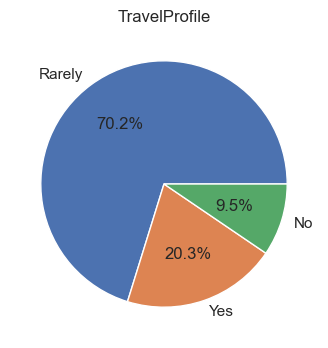

In [16]:
pieplot("TravelProfile")

#### We will use mode to impute missing values

### Department

In [17]:
df["Department"].value_counts()

Department
Analytics    3219
Sales        1615
Marketing     222
Name: count, dtype: int64

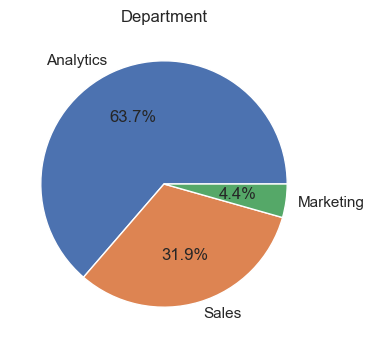

In [18]:
pieplot("Department")

#### We will use mode to impute missing values

### HomeToWork

<Figure size 400x400 with 0 Axes>

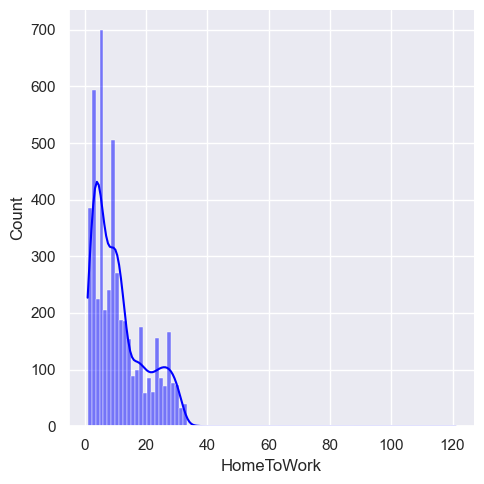

In [19]:
displot("HomeToWork")

In [20]:
df[df["HomeToWork"] > 40]

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
782,5110783.0,0.0,52.0,No,Sales,121.0,Statistics,Male,40.0,3.0,3.0,Executive,1.0,1.0,2.0,0.0,20.0,16.0,0.0,0.0,M,18482.0


In [21]:
# there is one outlier where home to work distance is 121. removing this record
df = df.drop(782)

<Figure size 400x400 with 0 Axes>

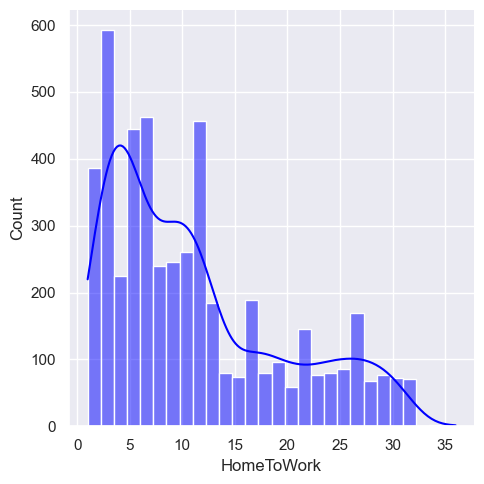

In [22]:
displot("HomeToWork")

#### Note:- We can impute missing values using median since data is right skewed

### EducationField

In [23]:
df["EducationField"].value_counts()

EducationField
Statistics           2128
CA                   1560
Marketing Diploma     603
Engineer              487
Other                 284
MBA                   117
Name: count, dtype: int64

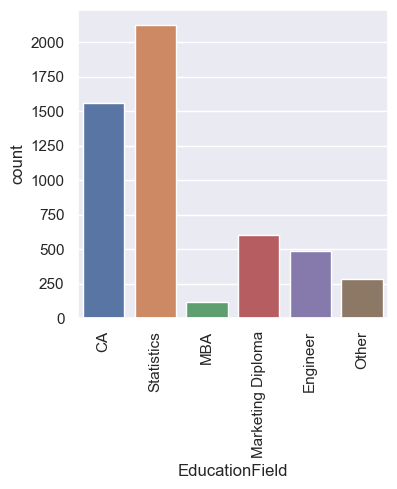

In [24]:
countplot("EducationField")

### Gender

In [25]:
df["Gender"].value_counts()

Gender
Male      3093
Female    1338
F          702
Name: count, dtype: int64

In [26]:
# changing F to female
df["Gender"] = df["Gender"].apply(lambda x: "Female" if x=="F" else x)

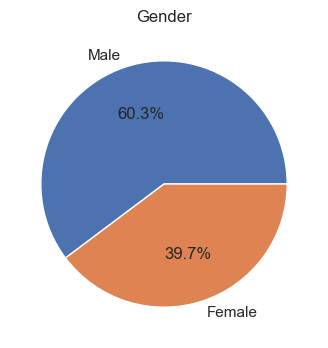

In [27]:
pieplot("Gender")

### HourlnWeek

<Figure size 400x400 with 0 Axes>

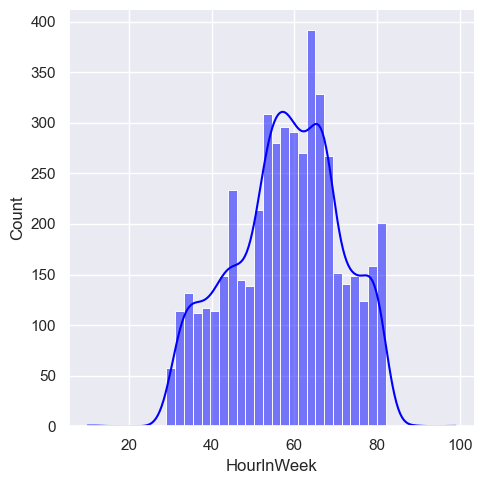

In [28]:
displot("HourlnWeek")

In [29]:
df[df["HourlnWeek"]<20]

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
1157,5111158.0,0.0,41.0,Rarely,Analytics,22.0,CA,Male,12.0,3.0,3.0,Manager,1.0,1.0,9.0,1.0,21.0,16.0,4.0,NaN,M,18741.0
4351,5114352.0,0.0,40.0,Rarely,Analytics,NaN,CA,Male,10.0,3.0,4.0,Manager,1.0,0.0,8.0,1.0,20.0,15.0,3.0,7.0,M,17741.0


In [30]:
df[df["HourlnWeek"]>90]

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
1404,5111405.0,0.0,59.0,Rarely,Sales,26.0,Statistics,Female,99.0,3.0,1.0,Senior Manager,5.0,1.0,7.0,0.0,16.0,28.0,7.0,9.0,Single,22637.0


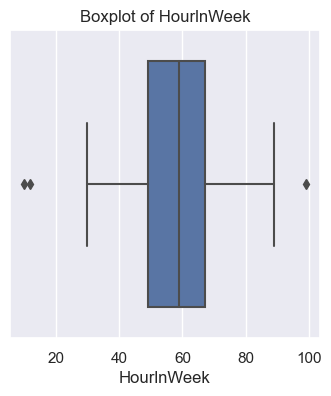

In [31]:
boxplot("HourlnWeek")

#### we can remove these outliers

In [32]:
df.drop(index=[1157, 4351, 1404], inplace=True)

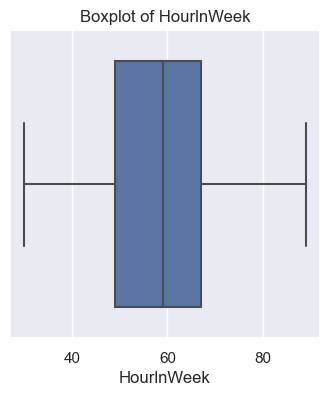

In [33]:
boxplot("HourlnWeek")

#### We can now impute missing values with mean 

### Involvement

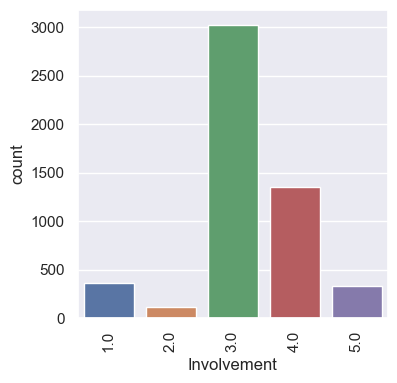

In [34]:
countplot("Involvement")

### WorkLifeBalance

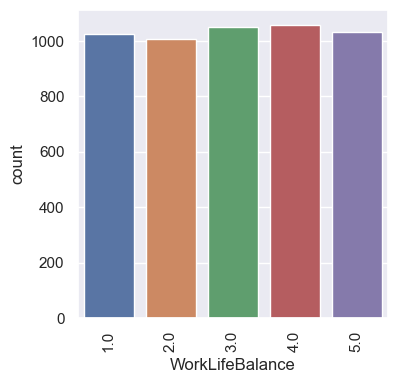

In [35]:
countplot("WorkLifeBalance")

### Designation

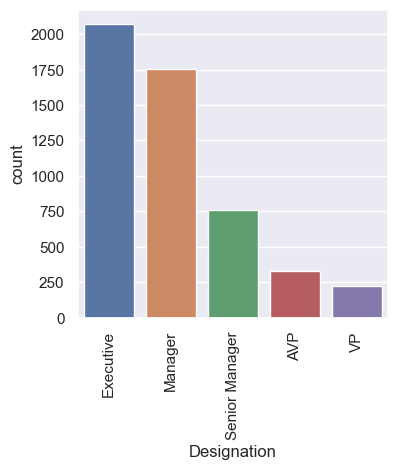

In [36]:
countplot("Designation")

### JobSatisfaction

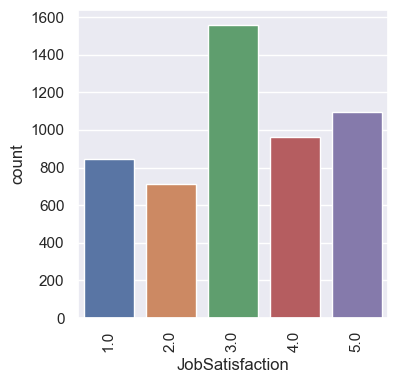

In [37]:
countplot("JobSatisfaction")

### ESOPs

In [38]:
df["ESOPs"].value_counts()

ESOPs
0.0    2638
1.0    2538
Name: count, dtype: int64

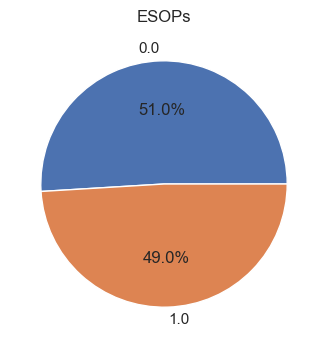

In [39]:
pieplot("ESOPs")

### NumCompaniesWorked

<Figure size 400x400 with 0 Axes>

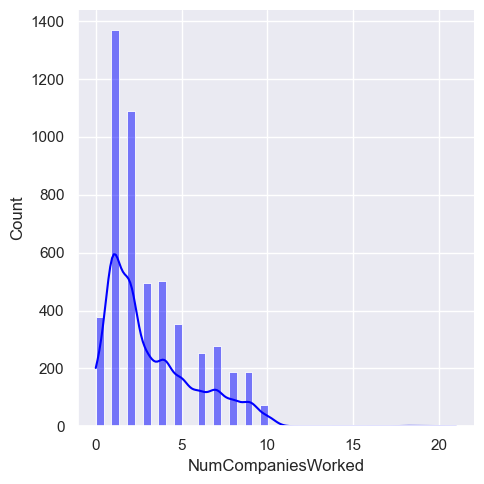

In [40]:
displot("NumCompaniesWorked")

### OverTime

In [41]:
df["OverTime"].value_counts()

OverTime
0.0    3554
1.0    1622
Name: count, dtype: int64

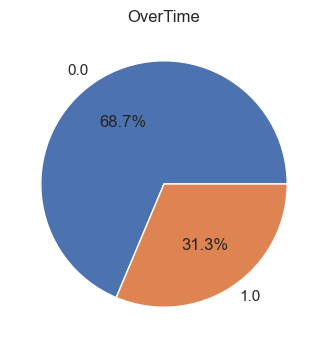

In [42]:
pieplot("OverTime")

### SalaryHikelastYear

<Figure size 400x400 with 0 Axes>

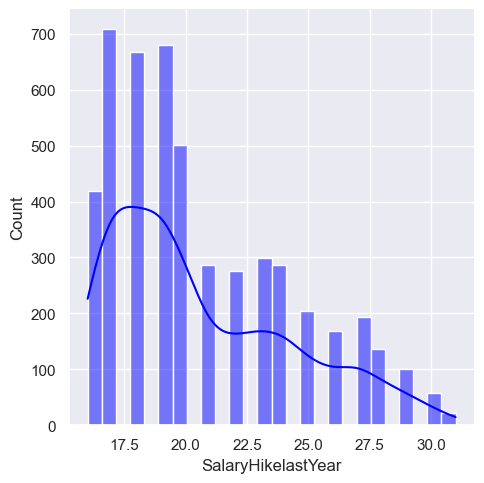

In [43]:
displot("SalaryHikelastYear")

### WorkExperience

<Figure size 400x400 with 0 Axes>

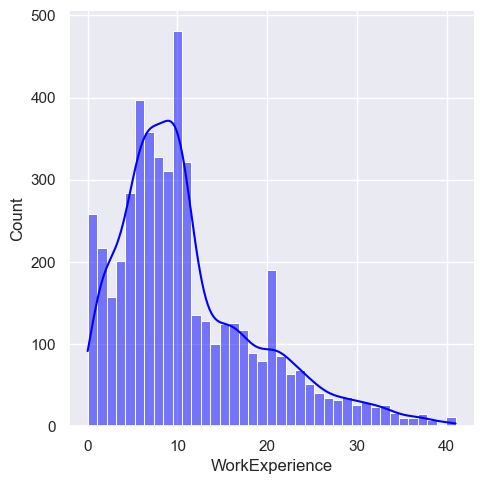

In [44]:
displot("WorkExperience")

### LastPromotion

<Figure size 400x400 with 0 Axes>

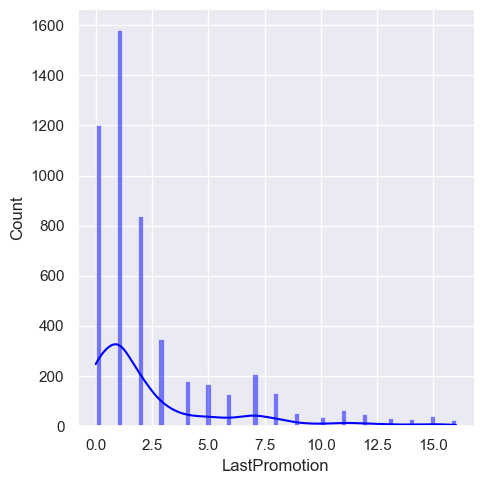

In [45]:
displot("LastPromotion")

### CurrentProfile


<Figure size 400x400 with 0 Axes>

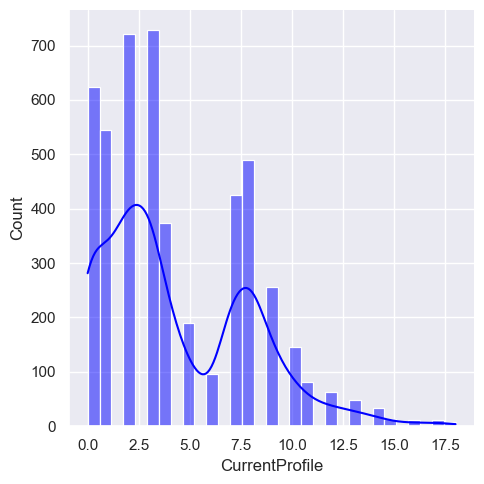

In [46]:
displot("CurrentProfile")

### MaritalStatus

In [47]:
df["MaritalStatus"].value_counts()

MaritalStatus
Single      1775
Married     1614
Divorsed    1016
M            771
Name: count, dtype: int64

In [48]:
# Changing M to Married
df["MaritalStatus"] = df["MaritalStatus"].apply(lambda x: "Married" if x=="M" else x)

In [49]:
df["MaritalStatus"].value_counts()

MaritalStatus
Married     2385
Single      1775
Divorsed    1016
Name: count, dtype: int64

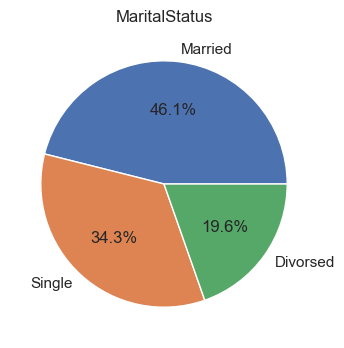

In [50]:
pieplot("MaritalStatus")

### MonthlyIncome

<Figure size 400x400 with 0 Axes>

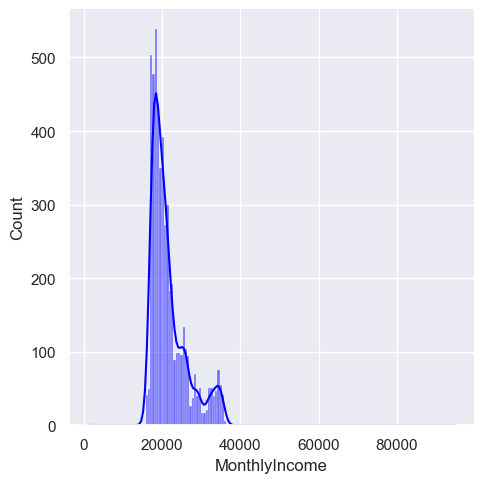

In [51]:
displot("MonthlyIncome")

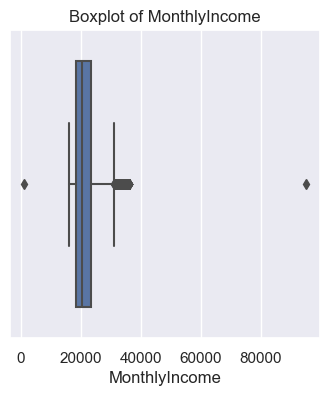

In [52]:
boxplot("MonthlyIncome")

In [53]:
df[df["MonthlyIncome"] < 10000]

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
4781,5114782.0,0.0,38.0,Rarely,Analytics,4.0,Engineer,Female,32.0,3.0,1.0,Manager,3.0,0.0,3.0,1.0,25.0,19.0,2.0,2.0,Single,1000.0


In [54]:
df[df["MonthlyIncome"] > 50000]

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
1528,5111529.0,0.0,36.0,Rarely,Analytics,6.0,Statistics,Female,52.0,4.0,2.0,Executive,5.0,1.0,9.0,1.0,19.0,6.0,0.0,0.0,Divorsed,95000.0


In [55]:
df.drop(index=[4781, 1528], inplace=True)

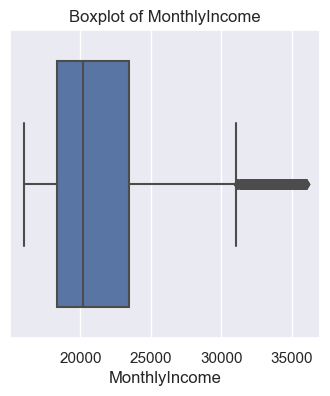

In [56]:
boxplot("MonthlyIncome")

<Figure size 400x400 with 0 Axes>

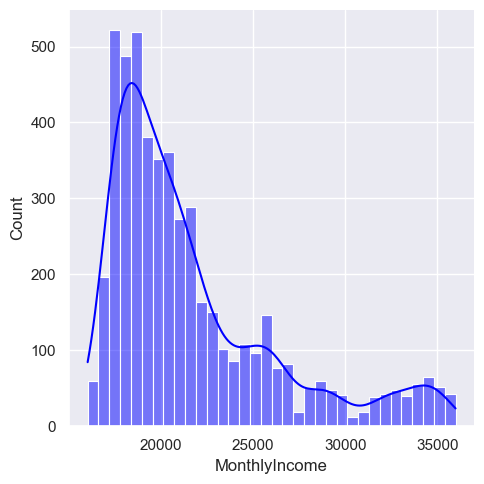

In [57]:
displot("MonthlyIncome")